In [6]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from torch_geometric.utils import from_networkx
from torch_geometric.data import Data
from collections import defaultdict
import numpy as np

In [30]:
import numpy as np

# Load the numpy file
eth_data_train = np.load('/home/cminds/CMInDS/GitHub/graph_t/datasets/eth_ucy/processed_data_diverse/eth_data_train.npy')

# Get the shape of the array
shape = eth_data_train.shape
print(shape)
# Display some values (first 5 rows)
values_sample = eth_data_train[0]

shape, values_sample
print(values_sample.shape)
print(values_sample[0][1])

(30307, 1, 20, 2)
(1, 20, 2)
[-1.59  0.93]


In [15]:
data = np.loadtxt("/home/cminds/CMInDS/GitHub/graph_t/data/dummy.txt")
print(data.shape)
print(data)

(4946, 4)


In [18]:
def add_spatial_edges(graph, frame, threshold=4):
    """
    Add edges between nodes in the graph within a certain distance threshold.
    """
    nodes = list(graph.nodes(data=True))
    for i, node_1 in enumerate(nodes):
        for j, node_2 in enumerate(nodes):
            if i != j:
                dist = np.sqrt((node_1[1]['x'] - node_2[1]['x'])**2 + (node_1[1]['y'] - node_2[1]['y'])**2)
                if dist <= threshold:
                    graph.add_edge(node_1[0], node_2[0],type="spatial")

In [27]:
def create_individual_spatial_graphs_from_npy(data, start_frame, obs_frames=8, spatial_threshold=100.0):
    """
    Create individual graphs for each frame from the numpy data, considering only those pedestrians
    that are present in all frames.
    """
    end_obs_frame = start_frame + obs_frames

    # Extract the x and y coordinates
    coords = data[0, :, start_frame:end_obs_frame, :]
    print(coords)
    graphs = []
    for frame_data in coords:
        graph = nx.Graph()

        # Iterate over the pedestrians in the frame
        for ped_id, (x, y) in enumerate(frame_data):
            graph.add_node(ped_id, x=x, y=y)

            # Add spatial edges
            add_spatial_edges(graph, frame_data, spatial_threshold)
        
        graphs.append(graph)

    return graphs

[[[-1.59  0.93]
  [-1.59  0.93]
  [-1.59  0.93]
  [-1.59  0.93]
  [-1.59  0.93]
  [-1.59  0.93]
  [-1.59  0.93]
  [-1.59  0.93]]]


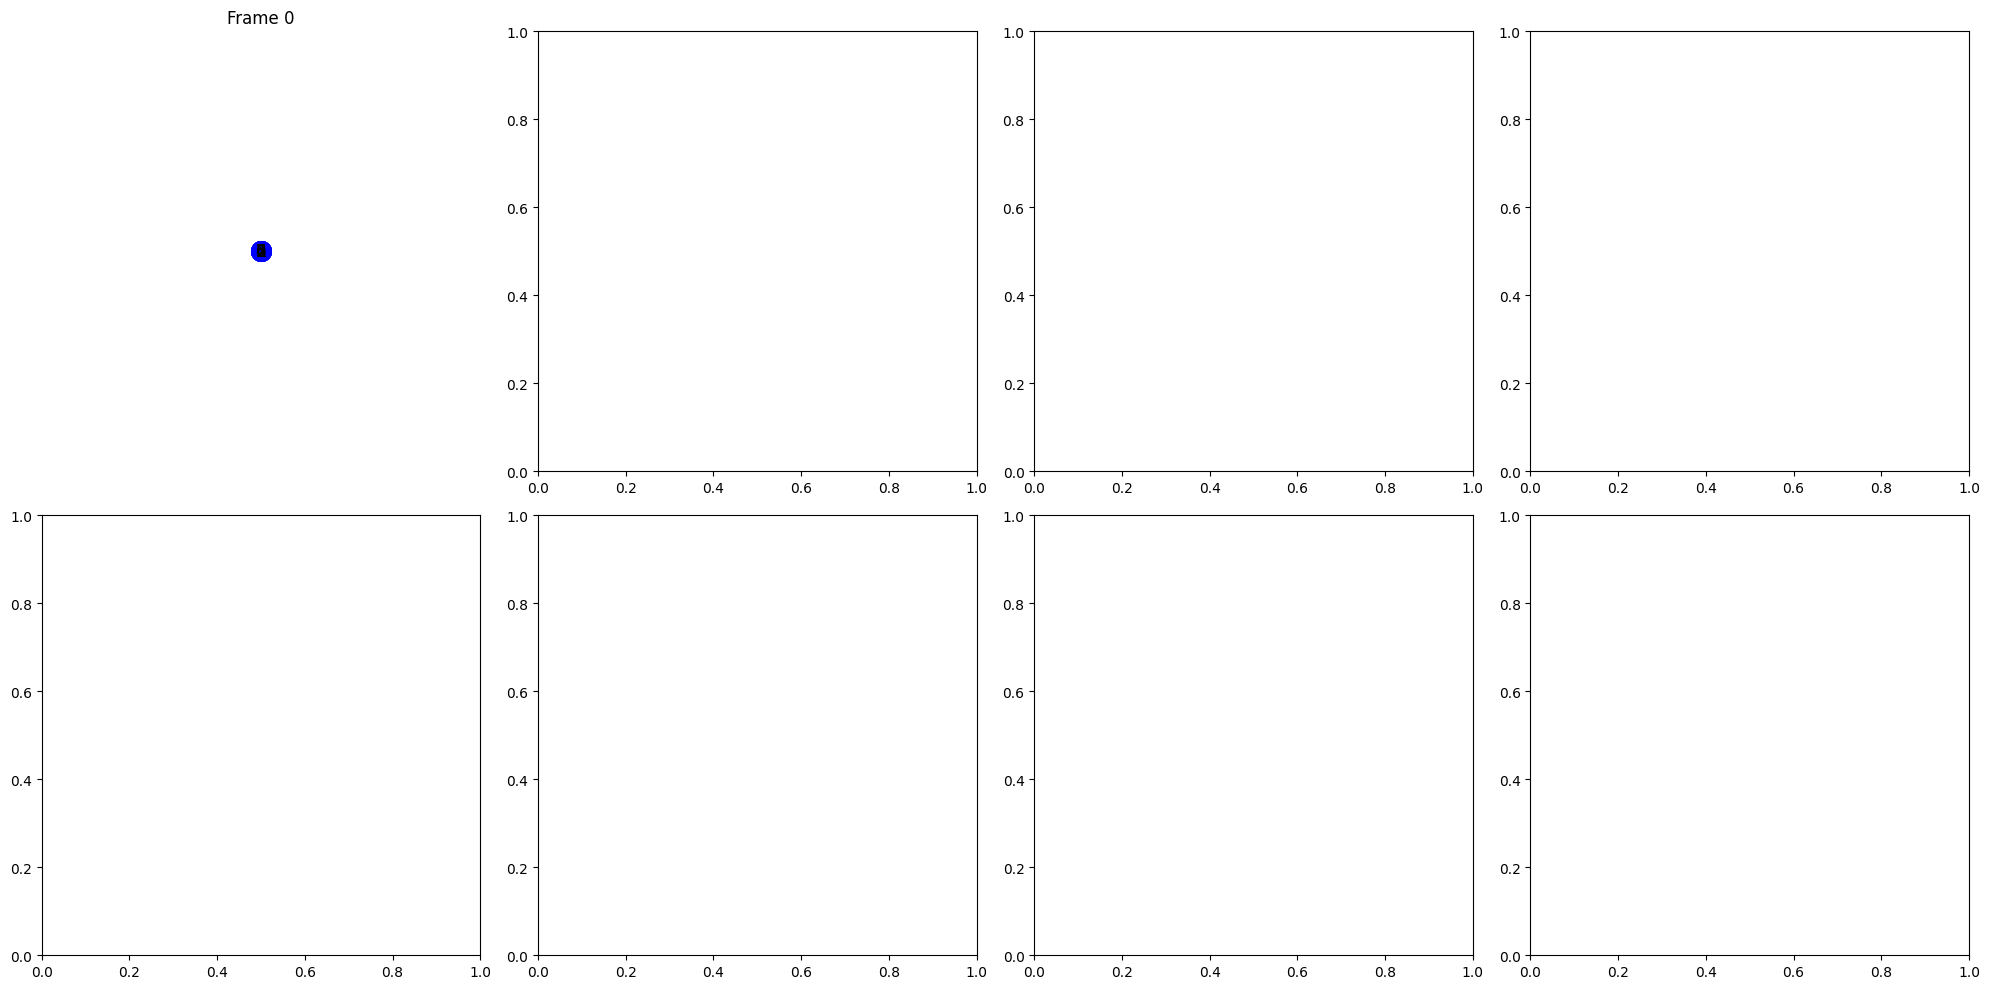

In [28]:
individual_graphs_npy = create_individual_spatial_graphs_from_npy(eth_data_train, 0)

# Visualize each graph
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for idx, graph in enumerate(individual_graphs_npy):
    ax = axes[idx // 4, idx % 4]
    pos = {node: (graph.nodes[node]['x'], graph.nodes[node]['y']) for node in graph.nodes()}
    nx.draw(graph, pos, ax=ax, with_labels=True, node_size=200, edge_color='red', node_color='blue')
    ax.set_title(f'Frame {idx}')

plt.tight_layout()
plt.show()